In [1]:
# Import dependencies
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping    
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.regularizers import l2


In [2]:
#Data preprocessing
#Define the path of the dataset and get the labels for categories
data_path='./dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
#Create the dict with labels and numeric values correspending
label_dict=dict(zip(categories,labels))
print('Dict to use:')
print(label_dict)
print(categories)

Dict to use:
{'asuna': 0, 'chizuru': 1, 'ichika': 2, 'itsuki': 3, 'kaede': 4, 'mai': 5, 'mami': 6, 'miku': 7, 'nino': 8, 'rei': 9, 'ruka': 10, 'serena': 11, 'sumi': 12, 'yotsuba': 13, 'zerotwo': 14}
['asuna', 'chizuru', 'ichika', 'itsuki', 'kaede', 'mai', 'mami', 'miku', 'nino', 'rei', 'ruka', 'serena', 'sumi', 'yotsuba', 'zerotwo']


In [3]:
#Define the fixed size
img_size=(75, 100)
data=[]
target=[]

In [4]:
#Runs every folder and add every img and label corresponding to folder
for category in tqdm(categories, desc="Processing images"):
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in tqdm(img_names, desc=f"Processing images in {category}", leave=False):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        try:
            resized = cv2.resize(img, (img_size[0], img_size[1]))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception:', e)

# Convert lists to arrays
# data=np.array(data)/255.0
data=np.reshape(data,(len(data),img_size[1], img_size[0],3))
target=np.array(target)
target=to_categorical(target)

Processing images: 100%|██████████| 15/15 [07:37<00:00, 30.49s/it]


In [5]:
# Split the dataset into training and validation sets
# stratofy is for save the proportion for each class
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.3, random_state=42, stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (8400, 100, 75, 3)
Validation data shape: (2160, 100, 75, 3)
Test data shape: (1440, 100, 75, 3)
Training labels shape: (8400, 15)
Validation labels shape: (2160, 15)
Test labels shape: (1440, 15)


In [16]:
model=Sequential()

model.add(Conv2D(15,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(15,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(50,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(50,activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


c:\Users\soporte3\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 73, 15)     │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 98, 73, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 36, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 49, 36, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 34, 15)     │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 47, 34, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 17, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 23, 17, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5865)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │       293,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 15)             │           765 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,625 (1.15 MB)

 Trainable params: 301,625 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
class TestPerformanceCallback(Callback):
    def __init__(self, test_data):
        super(TestPerformanceCallback, self).__init__()
        self.test_data = test_data
        self.test_loss = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        # Evaluate every epoch
        loss, accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_loss.append(loss)
        self.test_accuracy.append(accuracy)
        print(f"Epoch {epoch + 1} - Test loss: {loss:.4f} - Test accuracy: {accuracy:.4f}")

In [17]:
test_performance_callback = TestPerformanceCallback((X_test, y_test))
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val, y_val), callbacks=[test_performance_callback])

Epoch 1/50
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0712 - loss: 11.8766Epoch 1 - Test loss: 4.2605 - Test accuracy: 0.0938
263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.0713 - loss: 11.8328 - val_accuracy: 0.1056 - val_loss: 4.2487
Epoch 2/50
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1327 - loss: 4.1172Epoch 2 - Test loss: 3.8216 - Test accuracy: 0.2021
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.1329 - loss: 4.1163 - val_accuracy: 0.1894 - val_loss: 3.8303
Epoch 3/50
261/263 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2408 - loss: 3.6241Epoch 3 - Test loss: 3.4872 - Test accuracy: 0.2736
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2409 - loss: 3.6232 - val_accuracy: 0.2769 - val_loss: 3.4655
Epoch 4/50
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3198 - loss: 3.2984Epoch 4 - Test loss: 3.1754 - Test accuracy: 0.3375
263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - accuracy: 0.3200 - loss: 3.2978 - val_accurac

In [18]:
model.save('exportedModels/modelCNN.h5')

In [19]:
model.evaluate(X_test, y_test, verbose=2)

45/45 - 0s - 7ms/step - accuracy: 0.7028 - loss: 1.6998


[1.6998106241226196, 0.7027778029441833]

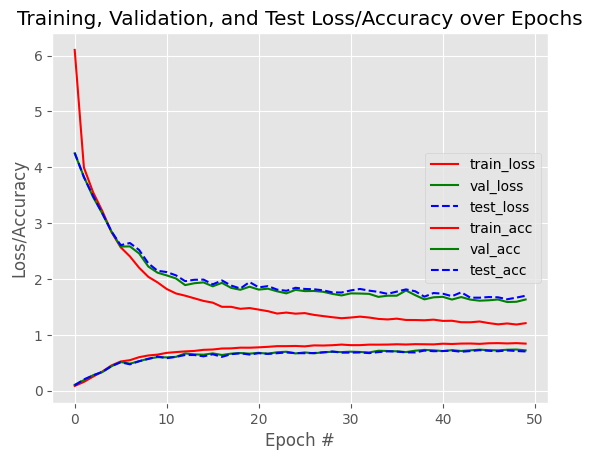

In [20]:
N = len(history.history["loss"])

plt.style.use("ggplot")
plt.figure()

# Loss
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss", color='red')
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss", color='green')
plt.plot(np.arange(0, N), test_performance_callback.test_loss, '--', label="test_loss", color='blue')

# Accuaracy
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc", color='red')
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc", color='green')
plt.plot(np.arange(0, N), test_performance_callback.test_accuracy, '--', label="test_acc", color='blue')

plt.title("Training, Validation, and Test Loss/Accuracy over Epochs")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.show()


In [21]:
# Make predictions
predictions = model.predict(X_test)

# Get class predicted with most probability
predicted_classes = np.argmax(predictions, axis=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


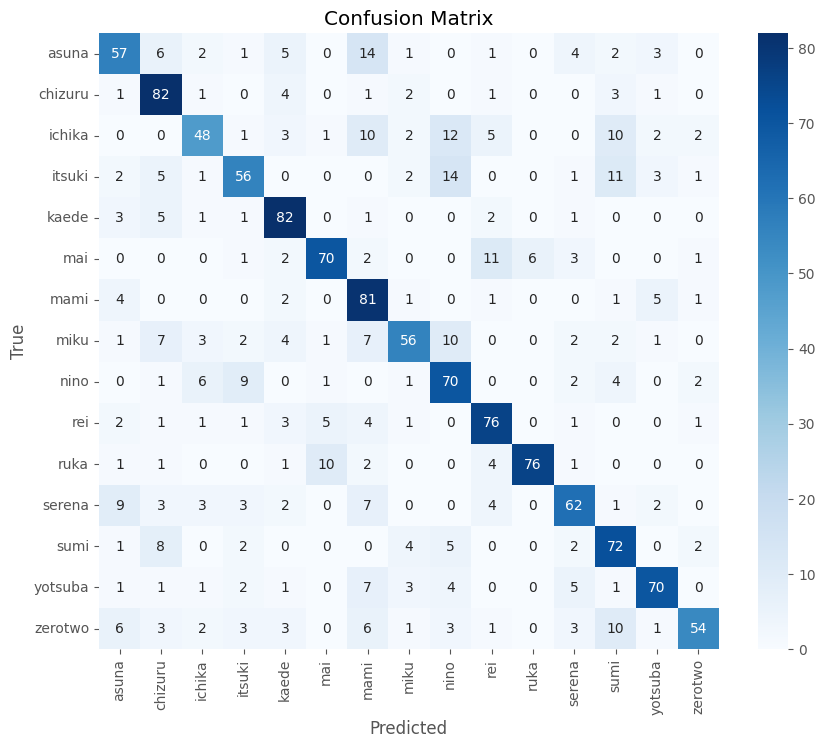

In [22]:
# confusion matrix
true_classes = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()